In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [56]:
# Take in all of employment and unemployment data and read it into pandas
phoenix_employment = "Resources/phoenix_employment.csv"
phoenix_unemployment = "Resources/phoenix_unemployment.csv"

phoenix_em_df = pd.read_csv(phoenix_employment, index_col=0)
phoenix_un_df = pd.read_csv(phoenix_unemployment, index_col=0)

phoenix_em_df 
phoenix_un_df 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1999,1578066,1584222,1585224,1580055,1588296,1596756,1604886,1595958,1600052.0,1604937.0,1614940.0,1622822.0
2000,1593471,1602769,1599895,1607478,1598814,1610811,1605966,1606272,1620675.0,1627557.0,1633557.0,1647067.0
2001,1636850,1648610,1651014,1649485,1647023,1650118,1654691,1642867,1659968.0,1668426.0,1667790.0,1673006.0
2002,1654868,1675135,1675100,1678397,1680127,1688556,1689100,1694967,1707218.0,1708424.0,1710633.0,1709692.0
2003,1697363,1710594,1712821,1724357,1725624,1736581,1729695,1729691,1736622.0,1749473.0,1762317.0,1765233.0
2004,1753874,1762375,1762380,1769489,1772710,1783492,1796584,1790883,1796539.0,1812156.0,1821557.0,1824292.0
2005,1814437,1822286,1827021,1844704,1849858,1860494,1870868,1875603,1882879.0,1898907.0,1905650.0,1909234.0
2006,1901250,1913561,1922139,1928931,1936819,1946039,1953536,1958179,1966730.0,1984257.0,1988557.0,1993927.0
2007,1975145,1978324,1983747,1977695,1980485,1990231,1989870,1986239,1996647.0,1997239.0,2006408.0,1999262.0


In [57]:
# Refactor employment data
phoenix_em_df.reset_index(level=0, inplace=True)
phoenix_em_df.head()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
filename = "employment.csv"
with open(filename, 'w') as f:
    f.write("Month,Employment\n")
    num_years = len(phoenix_em_df["Year"])
    for month in range(0,12):
        for year_num in range(0,num_years):
            month_data = round(phoenix_em_df[months[month]][year_num],0)
            if month_data > 0:
                year = phoenix_em_df["Year"][year_num]
                label = (year*100)+month+1
                month_line = f"{str(label)},{str(month_data)}\n"
                print(month_line)
                f.write(month_line)

199901,1479.0

200001,1534.0

200101,1581.0

200201,1567.0

200301,1589.0

200401,1628.0

200501,1716.0

200601,1831.0

200701,1885.0

200801,1901.0

200901,1777.0

201001,1677.0

201101,1693.0

201201,1732.0

201301,1779.0

201401,1828.0

201501,1879.0

201601,1945.0

201701,2000.0

201801,2070.0

201901,2135.0

199902,1502.0

200002,1557.0

200102,1606.0

200202,1582.0

200302,1608.0

200402,1650.0

200502,1745.0

200602,1864.0

200702,1911.0

200802,1913.0

200902,1772.0

201002,1689.0

201102,1708.0

201202,1746.0

201302,1797.0

201402,1842.0

201502,1897.0

201602,1966.0

201702,2020.0

201802,2093.0

201902,2155.0

199903,1512.0

200003,1570.0

200103,1617.0

200203,1594.0

200303,1616.0

200403,1664.0

200503,1760.0

200603,1881.0

200703,1924.0

200803,1910.0

200903,1765.0

201003,1699.0

201103,1718.0

201203,1759.0

201303,1807.0

201403,1849.0

201503,1902.0

201603,1973.0

201703,2028.0

201803,2101.0

201903,2160.0

199904,1522.0

200004,1572.0

200104,1611.0

200204,160

In [58]:
# Refactor unemployment data
phoenix_un_df.reset_index(level=0, inplace=True)
filename = "unemployment.csv"
with open(filename, 'w') as f:
    f.write("Month,Unemployment\n")
    num_years = len(phoenix_un_df["Year"])
    for month in range(0,12):
        for year_num in range(0,num_years):
            month_data = phoenix_un_df[months[month]][year_num]
            if month_data > 0:
                year = phoenix_un_df["Year"][year_num]
                label = (year*100)+month+1
                month_line = f"{str(label)},{str(month_data)}\n"
                print(month_line)
                f.write(month_line)

199901,1578066

200001,1593471

200101,1636850

200201,1654868

200301,1697363

200401,1753874

200501,1814437

200601,1901250

200701,1975145

200801,1993471

200901,1929842

201001,1869615

201101,1861415

201201,1874555

201301,1901053

201401,1953341

201501,2034569

201601,2105712

201701,2174954

201801,2254317

201901,2347408

199902,1584222

200002,1602769

200102,1648610

200202,1675135

200302,1710594

200402,1762375

200502,1822286

200602,1913561

200702,1978324

200802,1991054

200902,1928190

201002,1874869

201102,1865691

201202,1885876

201302,1911346

201402,1964689

201502,2045728

201602,2123264

201702,2193379

201802,2282747

201902,2366730

199903,1585224

200003,1599895

200103,1651014

200203,1675100

200303,1712821

200403,1762380

200503,1827021

200603,1922139

200703,1983747

200803,1988239

200903,1918768

201003,1878510

201103,1873061

201203,1891035

201303,1912337

201403,1982414

201503,2050610

201603,2131239

201703,2203637

201803,2288154

201903,2

In [59]:
def get_month(date):
    year = date.year
    month = date.month
    return (year*100)+month

In [60]:
#Get Zillow data
data_file = "../Zillow_pivot_cleaned.csv"
label_file = "../Phoenix_Zillow_Codes.xlsx"
labelsdf = pd.read_excel(label_file)
labelsdf = labelsdf.drop(labelsdf.columns[2],axis=1)
df = pd.read_csv(data_file,parse_dates=['Date'])
for code in df.columns:
    if code!='Date':
        df[code] = df[code].astype(float)
df["Month"] = df["Date"].apply(get_month)
df.head()

,Date,C36159_BSICG,C36159_BSICT,C36159_DOZ,C36159_FOR10K,C36159_MDLNSAH,C36159_MDLSAAH,C36159_MLNSAH,C36159_MLSAAH,C36159_MTURN,...,C36159_SCSAMT,C36159_SCSATT,C36159_SCTT,C36159_SP,C36159_SPBT,C36159_SPFS,C36159_SPMT,C36159_SPTT,C36159_STLR,Month
0,2008-01-31,NaN,NaN,NaN,8.17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200801
1,2008-02-29,NaN,NaN,NaN,9.26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200802
2,2008-03-31,NaN,NaN,NaN,9.89,NaN,NaN,NaN,NaN,0.0032,...,384.0,291.0,238.0,221500.0,156900.0,NaN,244300.0,465500.0,NaN,200803
3,2008-04-30,NaN,NaN,NaN,13.97,NaN,NaN,NaN,NaN,0.0039,...,349.0,260.0,314.0,212600.0,147400.0,NaN,240300.0,428200.0,NaN,200804
4,2008-05-31,NaN,NaN,NaN,14.80,NaN,NaN,NaN,NaN,0.0042,...,372.0,257.0,335.0,204600.0,137300.0,NaN,233500.0,413900.0,NaN,200805


In [61]:
# Merge data to compare employment, unemployment and median sales price
employmentdf = pd.read_csv("employment.csv")
unemploymentdf = pd.read_csv("unemployment.csv")
pricedf = df.loc[:,["Month","Date","C36159_SP"]]
pricedf = pricedf.rename(columns={"C36159_SP":"Median Sales Price"})
newdf = pd.merge(employmentdf,unemploymentdf,left_on='Month',right_on='Month')
newdf = pd.merge(newdf,pricedf,left_on='Month',right_on='Month')
newdf.sort_values("Month",inplace=True)
newdf = newdf.loc[newdf["Median Sales Price"] > 0]
newdf.index = range(len(newdf.index))
newdf = newdf.drop(columns = ['Month'])
newdf.head()

,Employment,Unemployment,Date,Median Sales Price
0,1910.0,1988239.0,2008-03-31,221500.0
1,1901.0,1989849.0,2008-04-30,212600.0
2,1894.0,1979651.0,2008-05-31,204600.0
3,1855.0,1978204.0,2008-06-30,195700.0
4,1822.0,1965921.0,2008-07-31,186600.0


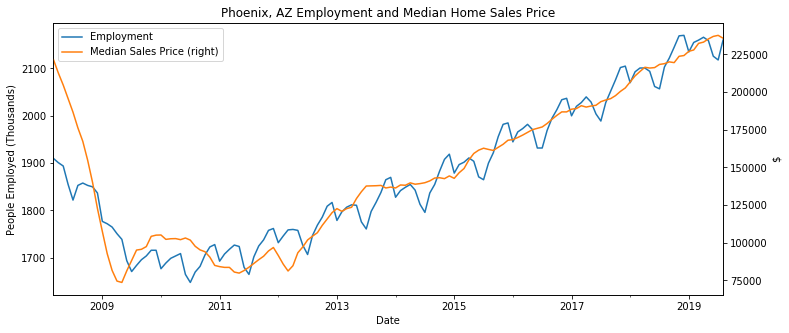

In [67]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
newdf.plot(x='Date',y='Employment',ax=ax)
newdf.plot(x='Date',y='Median Sales Price',secondary_y=True,ax=ax)
ax.set_ylabel("People Employed (Thousands)")
ax.right_ax.set_ylabel("$")
ax.set_title("Phoenix, AZ Employment and Median Home Sales Price")
fig.savefig("../Presentation/employment.png")